In [1]:
# Importing neccessary tols for analysis
import pandas as pd 
import numpy as np

In [12]:
#importing the data
contraceptive = pd.read_csv('C:\\Users\\Lab\\Data\\New Data\\contraceptive data.csv')
ds1 = pd.read_csv('C:\\Users\\Lab\\Data\\New Data\\dataset 1.csv')
initiation = pd.read_csv('C:\\Users\\Lab\\Data\\New Data\\initiation.csv')
enrolled = pd.read_csv('C:\\Users\\Lab\\Data\\New Data\\enrolled.csv')

In [13]:
# Merging all the data stes inton one new dataset
DF = pd.merge(contraceptive, initiation)

#Dropping the empty column created while merged
DF.drop('Unnamed: 2', axis=1, inplace=True)

print(DF)

    MethodInitiated         PTID InitiationDate
0              DMPA  562300252.0      3/11/2019
1              DMPA  562301590.0      2/27/2019
2              DMPA  562308936.0      2/11/2020
3              DMPA  562301199.0      2/21/2020
4              DMPA  562304872.0      2/21/2020
..              ...          ...            ...
159         JADELLE  562311349.0     10/10/2019
160             NaN  562304536.0      2/17/2020
161         JADELLE  562306394.0       7/5/2019
162            DMPA  562310352.0     12/10/2019
163         JADELLE  562310919.0      1/21/2020

[164 rows x 3 columns]


In [14]:
#Merging DF dataframe with the iniation data set
DFnew = pd.merge(DF, enrolled)
print (DFnew)

                 MethodInitiated         PTID InitiationDate         DOB
0                           DMPA  562300252.0      3/11/2019  1999-06-15
1                           DMPA  562301590.0      2/27/2019  1999-02-01
2                           DMPA  562301199.0      2/21/2020  1999-08-20
3        ORAL CONTRACEPTIVE PILL  562305234.0      2/24/2020  2003-04-10
4                        JADELLE  562300209.0      3/11/2019  1998-08-29
5                           DMPA  562300295.0       2/5/2019  1999-01-10
6                        JADELLE  562301518.0       3/5/2019  1998-04-21
7                        JADELLE  562301652.0      5/21/2019  1999-02-03
8                        JADELLE  562301652.0      5/21/2019  1999-02-03
9                        JADELLE  562308832.0     11/14/2019  2002-05-19
10  IMPLANON (NEXPLANON) IMPLANT  562300081.0       3/7/2019  1999-11-18
11  IMPLANON (NEXPLANON) IMPLANT  562300530.0      2/11/2020  2003-07-21
12                          DMPA  562300329.0      

In [15]:
#pd.concat([enrolled,contraceptive,initiation], axis=0, ignore_index = True)
#Merging DF dataframe with the data set 1
all_data = pd.concat([DFnew,ds1], axis=0, ignore_index = True)
print(all_data)

             MethodInitiated         PTID InitiationDate         DOB    S/N  \
0                       DMPA  562300252.0      3/11/2019  1999-06-15    NaN   
1                       DMPA  562301590.0      2/27/2019  1999-02-01    NaN   
2                       DMPA  562301199.0      2/21/2020  1999-08-20    NaN   
3    ORAL CONTRACEPTIVE PILL  562305234.0      2/24/2020  2003-04-10    NaN   
4                    JADELLE  562300209.0      3/11/2019  1998-08-29    NaN   
..                       ...          ...            ...         ...    ...   
116                      NaN          NaN            NaN         NaN   96.0   
117                      NaN          NaN            NaN         NaN   97.0   
118                      NaN          NaN            NaN         NaN   98.0   
119                      NaN          NaN            NaN         NaN   99.0   
120                      NaN          NaN            NaN         NaN  100.0   

    PID Code Visit Code Visit 1 date Visit 1 time V

In [16]:
#Displaying the first five rows of all the merged data set
all_data.head()

,MethodInitiated,PTID,InitiationDate,DOB,S/N,PID Code,Visit Code,Visit 1 date,Visit 1 time,Visit 2 date,Visit 2 time
0,DMPA,562300252.0,3/11/2019,1999-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DMPA,562301590.0,2/27/2019,1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DMPA,562301199.0,2/21/2020,1999-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORAL CONTRACEPTIVE PILL,562305234.0,2/24/2020,2003-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JADELLE,562300209.0,3/11/2019,1998-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Creating a contraceptive age column and determining the contraceptive age

#Converting to datetime
date_col1 = pd.to_datetime(all_data['DOB'])
date_col2 = pd.to_datetime(all_data['InitiationDate'])

# Determing the age at the initiation stage and rounding off to 1dp
all_data['contraceptive_age']=((date_col2 - date_col1).dt.days/365.25).round(1)

print(all_data['contraceptive_age'])

0      19.7
1      20.1
2      20.5
3      16.9
4      20.5
       ... 
116     NaN
117     NaN
118     NaN
119     NaN
120     NaN
Name: contraceptive_age, Length: 121, dtype: float64


In [18]:
#showing the first 50 rows of the final data with the contraceptive age in one decimal point
all_data.head(50)

,MethodInitiated,PTID,InitiationDate,DOB,S/N,PID Code,Visit Code,Visit 1 date,Visit 1 time,Visit 2 date,Visit 2 time,contraceptive_age
0,DMPA,562300252.0,3/11/2019,1999-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.7
1,DMPA,562301590.0,2/27/2019,1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1
2,DMPA,562301199.0,2/21/2020,1999-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
3,ORAL CONTRACEPTIVE PILL,562305234.0,2/24/2020,2003-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.9
4,JADELLE,562300209.0,3/11/2019,1998-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5
5,DMPA,562300295.0,2/5/2019,1999-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.1
6,JADELLE,562301518.0,3/5/2019,1998-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.9
7,JADELLE,562301652.0,5/21/2019,1999-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3
8,JADELLE,562301652.0,5/21/2019,1999-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3
9,JADELLE,562308832.0,11/14/2019,2002-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5


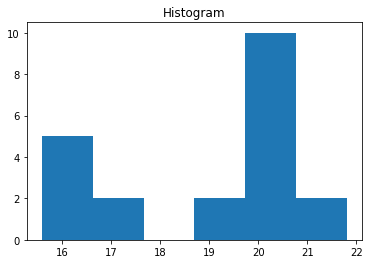

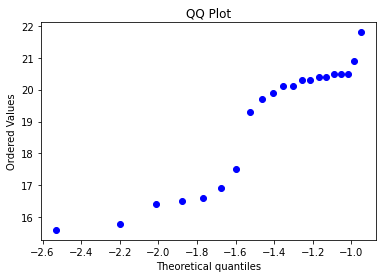

In [19]:
#establishing if the contraceptive age is normally distributed

#importing visualization tool, matplotlib and seaborn and statistical analysis tool
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#creating a historgram
plt.hist(all_data['contraceptive_age'], bins = 'auto')
plt.title('Histogram')
plt.show()

#Creating a QQ plot
stats.probplot(all_data['contraceptive_age'], dist = 'norm', plot = plt)
plt.title('QQ Plot')
plt.show()

In [20]:
#Carrying out a statistical test to establish the difference in age among the users of the 4 types of contraceptives

#Peforming a one-way ANOVA test
result = stats.f_oneway(
    all_data[all_data['MethodInitiated'] == 'DMPA']['contraceptive_age'],
    all_data[all_data['MethodInitiated'] == 'JADELLE']['contraceptive_age'],
    all_data[all_data['MethodInitiated'] == 'ORAL CONTRACEPTIVE PILL']['contraceptive_age'],
    all_data[all_data['MethodInitiated'] == 'COPPER IUD']['contraceptive_age']
)

#Interpreting the output
alpha = 0.05
if result.pvalue < alpha:
    print("There is a statistically significant difference in ageamong the usersof the four types of contraceptive.")
else:
    print("There is no statistically significant difference in ageamong the usersof the four types of contraceptive.")
    

There is a statistically significant difference in ageamong the usersof the four types of contraceptive.
